# Capstone Project: Model <br>

#### Brandie Hatch

### Modeling

- Imports, Data Reading, Model Prep
- Modeling
- Model Evaluation

#### Performing two types of models:
1. Clustering / k-Means to see if there are any interesting patterns in the data
2. Supervised Classification - likely a combination of Logistic Regression, KNN Classifier, Random Forest, Decision Trees, Naive Bayes, and SVM to see which one performs the best at accurately predicting male or female based on education attainment, labor types, income, etc.

## Imports, Data Reading, and Model Prep

In [1]:
# python library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

%matplotlib inline
pd.options.display.max_columns =999


In [2]:
# Read in Data

df = pd.read_csv('./data/data_clean.csv', index_col=False)
print(df.shape)
df.head()

(3239553, 26)


,AGEP,CIT,COW,ENG,ESR,FFSP,LANX,MAR,MULTG,NOC,OCCP,PINCP,POVPIP,RAC1P,SCH,SCHG,SCHL,SCIENGP,SCIENGRLP,SEMP,SEX,WAGP,WKEXREL,WKL,WRK,STATE
0,35,1,1,0,6,0,2,1,0,-1,6250,63000,-1,1,1,0,17,0,0,0,1,63000,0,1,0,18
1,25,1,0,0,6,0,2,5,0,-1,9,0,-1,1,1,0,12,0,0,0,1,0,0,3,0,48
2,21,5,2,0,1,0,2,5,0,-1,4740,2000,-1,6,3,15,19,0,0,0,2,2000,0,1,0,18
3,49,1,1,0,6,0,2,3,0,-1,110,0,-1,1,1,0,21,1,2,0,1,0,0,2,0,4
4,18,1,1,0,6,0,2,5,0,-1,4110,6000,-1,1,2,15,16,0,0,0,2,6000,0,1,2,6


In [3]:
df = df.sample(n=10000, replace=False, axis=0, ignore_index=True, random_state=42)
print(df.shape)
df.head()

(10000, 26)


,AGEP,CIT,COW,ENG,ESR,FFSP,LANX,MAR,MULTG,NOC,OCCP,PINCP,POVPIP,RAC1P,SCH,SCHG,SCHL,SCIENGP,SCIENGRLP,SEMP,SEX,WAGP,WKEXREL,WKL,WRK,STATE
0,49,1,0,0,6,0,2,3,1,2,9,27800,136,1,1,0,19,0,0,0,1,0,12,3,2,26
1,70,1,0,0,6,0,2,2,1,0,9,38000,442,1,1,0,13,0,0,0,1,0,12,3,2,42
2,58,1,1,0,1,0,2,1,1,0,410,89000,501,1,1,0,16,0,0,0,1,89000,1,1,1,36
3,76,1,0,0,6,0,2,2,1,0,9,96400,501,1,1,0,21,2,2,0,1,0,0,3,2,17
4,57,1,0,0,6,0,2,3,1,0,9,9700,73,1,1,0,16,0,0,0,1,0,0,3,2,39


In [4]:
# Prepare X matrix

X = df[['SCHL', 'PINCP']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [5]:
# Fit a k-means clustering model

km = KMeans(init='random', n_clusters=3, n_init=5, max_iter=100, random_state=42)
km.fit(X_sc)

KMeans(init='random', max_iter=100, n_clusters=3, n_init=5, random_state=42)

In [6]:
# Look at Centroids

km.cluster_centers_


array([[ 0.40031647, -0.03040914],
       [-1.72507535, -0.78339098],
       [ 0.81742084,  2.70733044]])

In [7]:
# Class attribute

km.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
km.predict(X_sc)

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
# attach predicted cluster to original points
df['cluster'] = km.labels_
df

,AGEP,CIT,COW,ENG,ESR,FFSP,LANX,MAR,MULTG,NOC,OCCP,PINCP,POVPIP,RAC1P,SCH,SCHG,SCHL,SCIENGP,SCIENGRLP,SEMP,SEX,WAGP,WKEXREL,WKL,WRK,STATE,cluster
0,49,1,0,0,6,0,2,3,1,2,9,27800,136,1,1,0,19,0,0,0,1,0,12,3,2,26,0
1,70,1,0,0,6,0,2,2,1,0,9,38000,442,1,1,0,13,0,0,0,1,0,12,3,2,42,0
2,58,1,1,0,1,0,2,1,1,0,410,89000,501,1,1,0,16,0,0,0,1,89000,1,1,1,36,0
3,76,1,0,0,6,0,2,2,1,0,9,96400,501,1,1,0,21,2,2,0,1,0,0,3,2,17,0
4,57,1,0,0,6,0,2,3,1,0,9,9700,73,1,1,0,16,0,0,0,1,0,0,3,2,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,29,1,1,0,1,0,2,5,1,0,4760,18000,373,1,1,0,16,0,0,0,1,18000,2,1,1,8,0
9996,16,1,0,1,6,0,1,5,1,3,9,0,135,2,2,12,13,0,0,0,2,0,14,3,0,34,0
9997,19,1,9,0,3,0,2,5,1,0,9920,0,224,9,1,0,14,0,0,0,2,0,13,3,2,53,0
9998,50,1,1,0,1,0,2,2,1,0,9130,85000,501,1,1,0,16,0,0,0,1,85000,10,1,1,27,0


In [10]:
# Show mean values for x1 and x2 WITHIN EACH CLUSTER for data
df.groupby('cluster').mean()

,AGEP,CIT,COW,ENG,ESR,FFSP,LANX,MAR,MULTG,NOC,OCCP,PINCP,POVPIP,RAC1P,SCH,SCHG,SCHL,SCIENGP,SCIENGRLP,SEMP,SEX,WAGP,WKEXREL,WKL,WRK,STATE
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.842939,1.433488,1.520896,0.252117,3.076892,0.023491,1.834881,2.530456,1.019803,0.418328,3149.664163,33028.673313,318.029227,1.813166,1.148866,1.764409,18.346353,0.464081,0.533734,1119.658427,1.526495,23115.675908,4.690795,1.649686,1.264545,27.768369
1,15.439642,1.377049,0.124193,0.349727,0.751615,0.022355,1.323398,4.611028,1.097367,1.906110,382.123696,-13404.733731,277.602086,2.219076,1.611525,4.111773,5.462494,0.000000,0.000000,-7772.022355,1.496274,1176.492300,5.747144,0.379036,0.223050,28.107799
2,53.324812,1.545865,2.129323,0.190977,1.790977,0.009023,1.842105,1.569925,1.018045,0.694737,2166.237594,201833.383459,498.000000,1.762406,1.030075,0.324812,20.875188,1.102256,1.410526,15147.323308,1.293233,142068.992481,3.115789,1.219549,1.103759,25.574436


In [11]:
km.cluster_centers_

array([[ 0.40031647, -0.03040914],
       [-1.72507535, -0.78339098],
       [ 0.81742084,  2.70733044]])

In [12]:
# silohuet score
# and plot - look for the elbow in the plot

In [13]:
## Create a dataframe for cluster_centers (centroids)

centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=["SCHL", "PINCP"]
)

centroids.head()

# from James - - age, schl, income distance along age axis

,SCHL,PINCP
0,18.347220,33032.201339
1,5.465740,-13394.502979
2,20.875188,201833.383459


<Figure size 504x504 with 0 Axes>

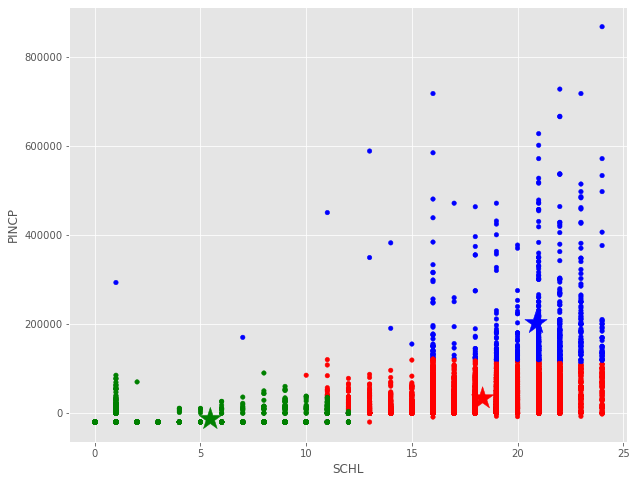

In [14]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids

colors = ["red", "green", "blue"]
df['color'] = df['cluster'].map(lambda p: colors[p])
ax = df.plot(    
    kind="scatter", 
    x="SCHL", y="PINCP",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="SCHL", y="PINCP", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

## Modeling

In [15]:
silhouette_score(X_sc, km.labels_)

0.5854670290172024

In [16]:
scores = []
for k in range(2, 31):
    km = KMeans(n_clusters=k)
    km.fit(X_sc)
    inertia = km.inertia_
    sil = silhouette_score(X_sc, km.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']
score_df.head()

,k,inertia,silhouette
0,2,10942.588219,0.562218
1,3,6272.100028,0.585396
2,4,4089.995845,0.495197
3,5,3057.417238,0.436094
4,6,2446.870208,0.439261


Text(0.5, 1.0, 'Silhouette Over k')

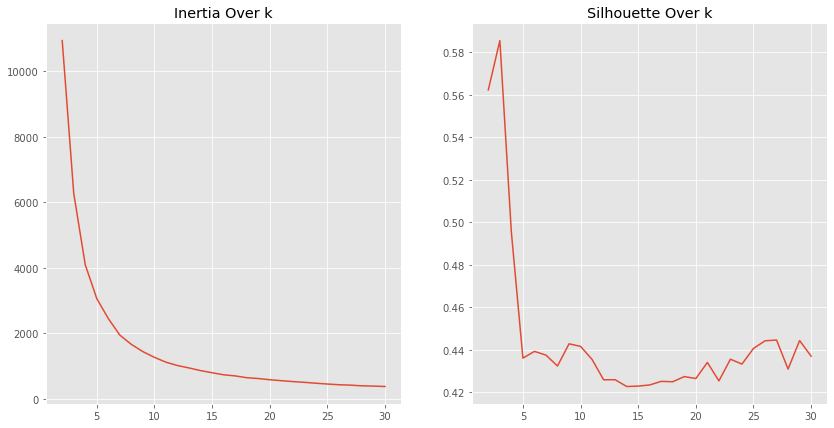

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].plot(score_df['k'], score_df['inertia'])
axes[0].set_title('Inertia Over k')

axes[1].plot(score_df['k'], score_df['silhouette'])
axes[1].set_title('Silhouette Over k')

The elbow of the plot is around 5, so I will run the model with a K of 5 to see if I get better results. 

### Findings



### Recommendations



## Sources